# mehrschichtiges Neuronales Netz in Tensorflow & Keras
https://keras.io/
![Image](./data/mnist2.png)

# Keras Python Machine Learning API importieren

In [24]:
import keras
keras.__version__

'2.2.4'

# importieren der gesamten MNIST Datenbank

In [25]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Ausgabe der Trainingsbilder:

In [26]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### Ausgabe der Trainings-Indizes:

In [27]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Ausgabe der Dimension des Arrays mit `.nidm`

In [28]:
print(train_images.ndim)

3


### Ausgabe der Shape (Form)

In [29]:
print(train_images.shape)

(60000, 28, 28)


In [30]:
len(train_images)

60000

### Testdatensätze...:

In [31]:
test_images.shape

(10000, 28, 28)

In [32]:
len(test_labels)

10000

In [33]:
test_labels.shape

(10000,)

In [34]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## NN erstellen

generell benötigen wir hierfür:

1. `Layer`

2. `Eingabedaten` 

3. `Verlustfunktion`

4. `Optimierer`
![Image](./data/nn.png)


### Module (layers & models) importieren

* Module: https://www.tensorflow.org/api_docs/python/tf/keras
* z.B. models: https://www.tensorflow.org/api_docs/python/tf/keras/models

In [35]:
from keras import models
from keras import layers

### Initialisieren eines leeren Netzes
#### mit dem Modul `models` bestimmen wir im folgenden einen linearen Stapel von Schichten `(Sequential)`

In [36]:
network = models.Sequential()

#### Mit dem Argument `layers` definieren wir eine Liste von Layern, die dem Modell hinzugefügt werden sollen und legen die jewewiligen Attribute fest.

##### 1. der hidden layer:

In [37]:
network.add(layers.Dense(512, activation='sigmoid', input_shape=(28 * 28,)))

+ `Dense` definiert einen layer in dem jeder Knoten mit jedem Knoten in der nachfolgenden verborgenen Schicht verbunden ist: `fully-connected Layer`
+ `input_shape` = Input layer mit 784 Eingabewerten, in unserem Falle also ein 2-D-Tensor mit 28*28 Werten
+ `activation` = Relu-Aktivierungs-Funktion
+ `512` = definiert die größe des hidden layers

---
##### 2. der output layer 

In [38]:
network.add(layers.Dense(10, activation='softmax'))

+ `10` (fully-connected) Knoten


+ auf die die `softmax` funktion angewandt wird:

---
---

In [39]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


##### zum trainieren des Netzes benötigen wir noch weitere 3 Parameter :
+ `loss` Verlustfunktion E = S-K https://keras.io/losses/ https://keras.io/backend/#categorical_crossentropy
+ `optimizer` Gewichtsanpassung https://keras.io/optimizers/ https://keras.io/optimizers/#rmsprop
+ `metrics`, definiert den Anteil der Bilder, die korrekt klassifiziert wurden https://keras.io/metrics/

In [40]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

##### Trainings- bzw. Testdaten vorbereiten, bzw. skalieren:

von [0-255] in einen Interval von [0, 1] 

In [41]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
print("Datentyp before: ", test_images.dtype)
print(test_images[1])
test_images = test_images.astype('float32') / 255
print("Datentyp after: ", test_images.dtype)
print(test_images[1])

Datentyp before:  uint8
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0 169 253 253 253 253
 253 253 218  30   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  52 250 253 210  32
  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  31  18
   0   0   0   0 209 253 25

---
---
##### Kodieren der Klassen (Ziffern) von 0 bis 9 - mit One-Hot-Kodierung .:

In [42]:
from keras.utils import to_categorical

print("Beispiel Label vor der Encodierung: ", train_labels[1])
print("Beispiel Label vor der Encodierung: ", train_labels[5])
train_labels = to_categorical(train_labels)
print("Beilspiel Label nach der Encodierung: ", train_labels[1])
print("Beispiel Label vor der Encodierung: ", train_labels[5])
test_labels = to_categorical(test_labels)

Beispiel Label vor der Encodierung:  0
Beispiel Label vor der Encodierung:  2
Beilspiel Label nach der Encodierung:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Beispiel Label vor der Encodierung:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


---
---
##### trainieren des Netzes
+ `fit()` übergibt dem Modell (NN) dee Numpy-Arrays der Eingabedaten `train_images` + Zielwerte `train_labels` 
+ `epochs` wie oft wir den gesamten Trainingssatz  durchlaufen möchten 
+ `batch_size`, Stapelgröße - wie viele Samples wir für eine Aktualisierung der Modellgewichte verwenden. 

In [43]:
network.fit(train_images, train_labels, epochs=20, batch_size=128)

Epoch 1/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.4239 - acc: 0.8863
Epoch 2/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.2372 - acc: 0.9311
Epoch 3/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.1797 - acc: 0.9472
Epoch 4/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.1409 - acc: 0.9585
Epoch 5/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.1141 - acc: 0.9665
Epoch 6/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0946 - acc: 0.9725
Epoch 7/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0801 - acc: 0.9767
Epoch 8/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0683 - acc: 0.9801
Epoch 9/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0590 - acc: 0.9824
Epoch 10/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0516 - acc: 0.9848

Anzeige:
+ `loss` Verlustfunktion
+ `acc` accuracy, Genauigkeit der Trainningsdaten, Korrektklassifizierungsrate

In [44]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss (Verlustrate):', test_loss)
print('test_acc (Korrektklassifzierungsrate):', test_acc)

10000/10000 [==============================] - 1s 74us/step
test_loss (Verlustrate): 0.06719356153210392
test_acc (Korrektklassifzierungsrate): 0.9807


[9.9994206e-01 6.8134329e-09 5.3692509e-07 1.5067563e-07 5.9261771e-07
 2.6780572e-07 2.5965599e-06 3.4615416e-05 8.1988256e-09 1.9162737e-05]
0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


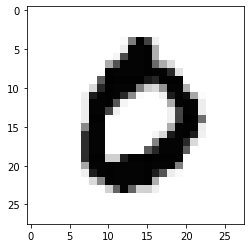

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

test_im = test_images[3]
plt.imshow(test_im.reshape(28,28), cmap='Greys')

predictions = network.predict(test_images)
print(predictions[3])
print(np.argmax(predictions[3]))
print(test_labels[3])

In [46]:
# 11. Save model
network.save('mnist_trained_model.h5')  # creates a HDF5 file